<a href="https://colab.research.google.com/github/Maharshii5/DLMLGEEK/blob/main/NOTACCURATE5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install yfinance pandas numpy tensorflow scikit-learn

[*********************100%***********************]  1 of 1 completed

Epoch 1/50



/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 7s 86ms/step - loss: 0.0643
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - loss: 0.0058
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - loss: 0.0043
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - loss: 0.0035
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 101ms/step - loss: 0.0031
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - loss: 0.0033
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - loss: 0.0028
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - loss: 0.0023
Epoch 9/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - loss: 0.0026
Epoch 10/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - loss: 0.0026
Epoch 11/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 103ms/step - loss: 0.0024
Epoch 12/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - loss: 0.0022
Epoch 13/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - loss: 0.0024
Epoch 14/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - loss: 0.0021
Epoch 15/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - loss: 0.0019
Epoch 16/50
3

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpl10aj_tj/pmcvjtkp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpl10aj_tj/1ndlgg2m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75786', 'data', 'file=/tmp/tmpl10aj_tj/pmcvjtkp.json', 'init=/tmp/tmpl10aj_tj/1ndlgg2m.json', 'output', 'file=/tmp/tmpl10aj_tj/prophet_model2dsqb7wb/prophet_model-20241101131318.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:13:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:13:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


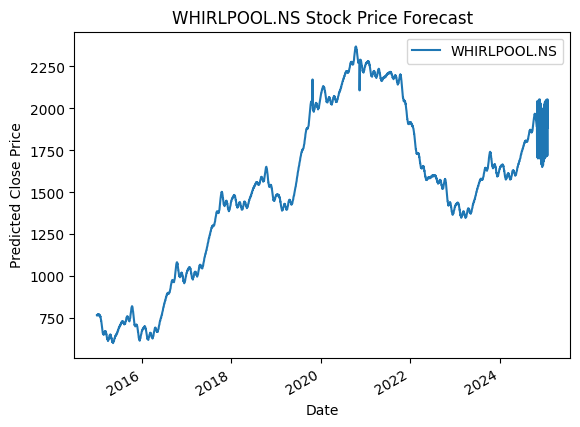

Future predictions for WHIRLPOOL.NS:
              ds         yhat
2487 2024-12-31  1864.004563
2488 2025-01-01  1864.049354
2489 2025-01-02  1872.361823
2490 2025-01-03  1873.390739
2491 2025-01-04  1701.244219
2492 2025-01-05  2038.134050
2493 2025-01-06  1878.584963
2494 2025-01-07  1876.780350
2495 2025-01-08  1875.453575
2496 2025-01-09  1882.518608
2497 2025-01-10  1882.450466
2498 2025-01-11  1709.374253
2499 2025-01-12  2045.509119
2500 2025-01-13  1885.377519
2501 2025-01-14  1883.151248
2502 2025-01-15  1881.543393
2503 2025-01-16  1888.439906
2504 2025-01-17  1888.281258
2505 2025-01-18  1715.152913
2506 2025-01-19  2051.230895
2507 2025-01-20  1890.992799
2508 2025-01-21  1888.565623
2509 2025-01-22  1886.619537
2510 2025-01-23  1893.001230
2511 2025-01-24  1892.117210
2512 2025-01-25  1718.025773
2513 2025-01-26  2052.883852
2514 2025-01-27  1891.159044
2515 2025-01-28  1886.978172
2516 2025-01-29  1883.021466


In [5]:
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt
from prophet import Prophet

stock_symbols = ['WHIRLPOOL.NS']  # Add more as needed

# Dictionary to store predictions for each company
company_predictions = {}

for symbol in stock_symbols:
    # Step 1: Load and Preprocess Data
    data = yf.download(symbol, start='2015-01-01', end='2024-11-01')
    close_prices = data['Close'].values

    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(close_prices.reshape(-1, 1))

    # Step 2: Prepare Training Data
    train_data_len = int(np.ceil(len(scaled_data) * 0.8))
    train_data = scaled_data[0:int(train_data_len), :]

    x_train, y_train = [], []
    for i in range(60, len(train_data)):
        x_train.append(train_data[i-60:i, 0])
        y_train.append(train_data[i, 0])

    x_train, y_train = np.array(x_train), np.array(y_train)
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

    # Step 3: Build the LSTM Model
    model = Sequential([
        LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)),
        Dropout(0.2),
        LSTM(50, return_sequences=False),
        Dropout(0.2),
        Dense(25),
        Dense(1)
    ])

    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(x_train, y_train, batch_size=64, epochs=50)

    # Step 4: Future Prediction using Facebook Prophet
    prophet_data = data.reset_index()[['Date', 'Close']]
    prophet_data.columns = ['ds', 'y']  # Rename for Prophet requirements

# Remove timezone information
    prophet_data['ds'] = pd.to_datetime(prophet_data['ds']).dt.tz_localize(None)

# Initialize and fit Prophet model
    prophet = Prophet()
    prophet.fit(prophet_data)

    future_dates = prophet.make_future_dataframe(periods=90)  # Predict 30 days into the future
    forecast = prophet.predict(future_dates)

    # Store and plot predictions
    company_predictions[symbol] = forecast[['ds', 'yhat']].tail(30)  # Only store future predictions
    forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].plot(x='ds', y='yhat', label=symbol)
    plt.title(f'{symbol} Stock Price Forecast')
    plt.xlabel('Date')
    plt.ylabel('Predicted Close Price')
    plt.legend()
    plt.show()

# Step 5: Access predictions for each company in the dictionary
for symbol, predictions in company_predictions.items():
    print(f"Future predictions for {symbol}:\n", predictions)


[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 18s 128ms/step - loss: 0.0094
Epoch 2/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 14s 53ms/step - loss: 8.3819e-04
Epoch 3/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 7s 69ms/step - loss: 7.4504e-04
Epoch 4/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 9s 53ms/step - loss: 7.1268e-04
Epoch 5/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 6s 72ms/step - loss: 7.2329e-04
Epoch 6/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - loss: 5.9865e-04
Epoch 7/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - loss: 5.2313e-04
Epoch 8/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 7s 74ms/step - loss: 5.6860e-04
Epoch 9/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 10s 76ms/step - loss: 4.6322e-04
Epoch 10/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 8s 54ms/step - loss: 4.9065e-04
Epoch 11/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 6s 67ms/step - loss: 6.0629e-04
Epoch 12/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 9s 51ms/step - loss: 4.6220e-04
Epoch 13/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 6s 70ms/step - loss: 4.4608e-04
Epoch 14/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step - loss: 3.7875e-04
Epoch 15/50
90/

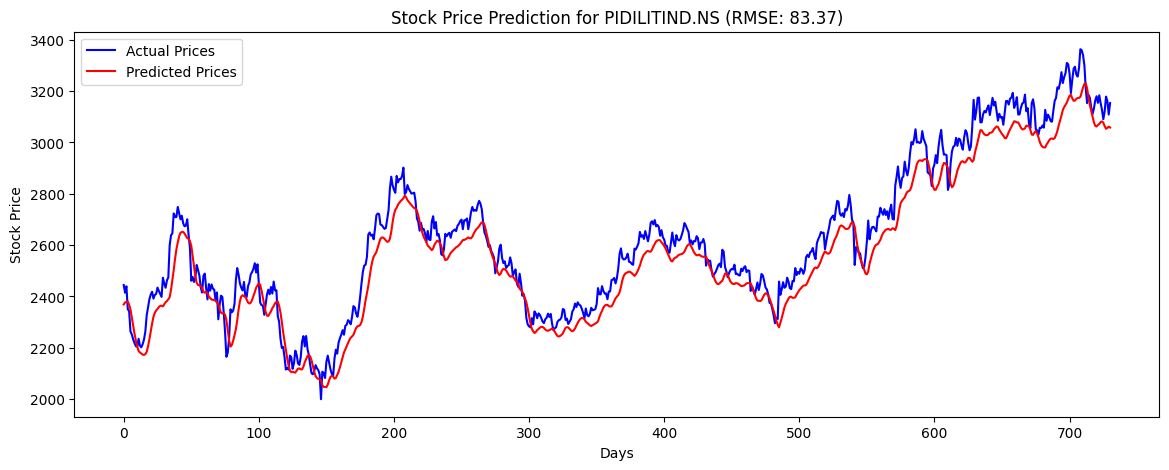

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import yfinance as yf
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

# Load historical stock data for a specific company
ticker = 'PIDILITIND.NS'  # Example: Astral Ltd.
data = yf.download(ticker, start='2010-01-01', end='2024-11-01')

# Preprocess the data
data = data[['Close']]
data = data.values
data = data.astype('float32')

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

# Create a training dataset
train_size = int(len(data_scaled) * 0.8)
train_data = data_scaled[:train_size]

# Prepare the data for LSTM
def create_dataset(dataset, time_step=1):
    X, Y = [], []
    for i in range(len(dataset) - time_step - 1):
        X.append(dataset[i:(i + time_step), 0])
        Y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(Y)

time_step = 60  # Look back 60 days
X_train, y_train = create_dataset(train_data, time_step)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=50, batch_size=32)

# Create the test dataset
test_data = data_scaled[train_size - time_step:]
X_test, y_test = create_dataset(test_data, time_step)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Get predictions for test data
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)  # Inverse the scaling for predictions
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))  # Inverse transform y_test for comparison

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test_rescaled, predictions))

# Plotting the results
plt.figure(figsize=(14, 5))
plt.plot(y_test_rescaled, label='Actual Prices', color='blue')
plt.plot(predictions, label='Predicted Prices', color='red')
plt.title(f'Stock Price Prediction for {ticker} (RMSE: {rmse:.2f})')
plt.xlabel('Days')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Generate future predictions for 90 days
future_predictions = []
last_sequence = test_data[-time_step:].reshape(1, time_step, 1)

for _ in range(180):
    next_pred = model.predict(last_sequence)
    future_price = scaler.inverse_transform(next_pred)[0, 0]
    future_predictions.append(future_price)

    # Update the sequence with the new predicted price
    next_sequence = np.append(last_sequence[:, 1:, :], next_pred.reshape(1, 1, 1), axis=1)
    last_sequence = next_sequence

# Print future predictions
print("Future 90-day price predictions:")
for i, price in enumerate(future_predictions, 1):
    print(f"Day {i}: {price:.2f}")


[*********************100%***********************]  1 of 1 completed

Epoch 1/50



/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


85/85 ━━━━━━━━━━━━━━━━━━━━ 10s 63ms/step - loss: 0.0106
Epoch 2/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step - loss: 8.2379e-04
Epoch 3/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 6s 71ms/step - loss: 8.1268e-04
Epoch 4/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 9s 52ms/step - loss: 7.9912e-04
Epoch 5/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 6s 71ms/step - loss: 7.5991e-04
Epoch 6/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 9s 61ms/step - loss: 7.6371e-04
Epoch 7/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 10s 52ms/step - loss: 7.0407e-04
Epoch 8/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 6s 71ms/step - loss: 6.8076e-04
Epoch 9/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - loss: 6.9736e-04
Epoch 10/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - loss: 6.2206e-04
Epoch 11/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 6s 68ms/step - loss: 6.0580e-04
Epoch 12/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 10s 60ms/step - loss: 5.7292e-04
Epoch 13/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 6s 65ms/step - loss: 5.5314e-04
Epoch 14/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 11s 71ms/step - loss: 5.8733e-04
Epoch 15/50
85/85 ━━━━━━━━

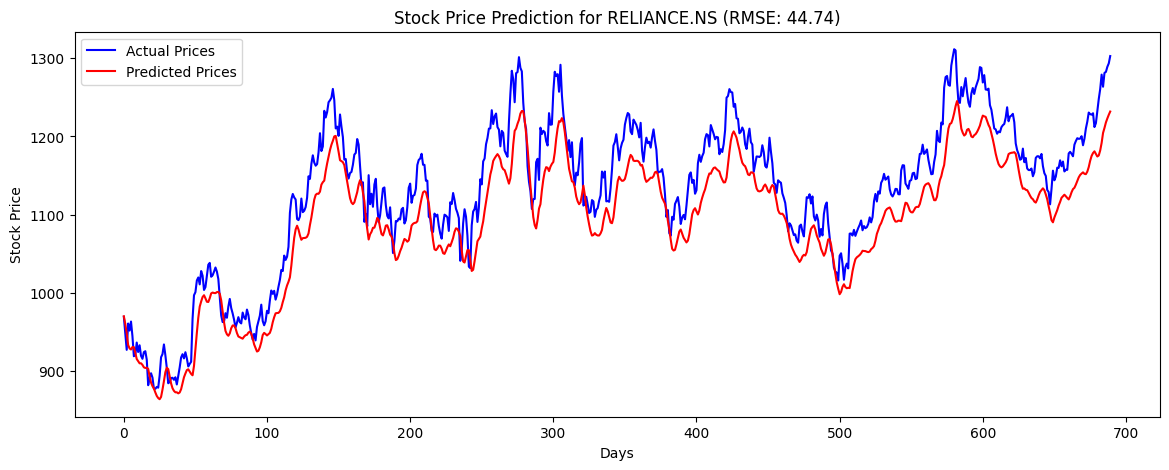

Future predictions for WHIRLPOOL.NS:
              ds         yhat
2487 2024-12-31  1864.004563
2488 2025-01-01  1864.049354
2489 2025-01-02  1872.361823
2490 2025-01-03  1873.390739
2491 2025-01-04  1701.244219
2492 2025-01-05  2038.134050
2493 2025-01-06  1878.584963
2494 2025-01-07  1876.780350
2495 2025-01-08  1875.453575
2496 2025-01-09  1882.518608
2497 2025-01-10  1882.450466
2498 2025-01-11  1709.374253
2499 2025-01-12  2045.509119
2500 2025-01-13  1885.377519
2501 2025-01-14  1883.151248
2502 2025-01-15  1881.543393
2503 2025-01-16  1888.439906
2504 2025-01-17  1888.281258
2505 2025-01-18  1715.152913
2506 2025-01-19  2051.230895
2507 2025-01-20  1890.992799
2508 2025-01-21  1888.565623
2509 2025-01-22  1886.619537
2510 2025-01-23  1893.001230
2511 2025-01-24  1892.117210
2512 2025-01-25  1718.025773
2513 2025-01-26  2052.883852
2514 2025-01-27  1891.159044
2515 2025-01-28  1886.978172
2516 2025-01-29  1883.021466


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import yfinance as yf
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

# Load historical stock data for a specific company
ticker = 'RELIANCE.NS'  # Example: Reliance Industries Limited
data = yf.download(ticker, start='2010-01-01', end='2025-01-01')

# Preprocess the data
data = data[['Close']]
data = data.values
data = data.astype('float32')

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

# Create a training dataset
train_size = int(len(data_scaled) * 0.8)
train_data = data_scaled[:train_size]

# Prepare the data for LSTM
def create_dataset(dataset, time_step=1):
    X, Y = [], []
    for i in range(len(dataset) - time_step - 1):
        X.append(dataset[i:(i + time_step), 0])
        Y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(Y)

time_step = 60  # Look back 60 days
X_train, y_train = create_dataset(train_data, time_step)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=50, batch_size=32)

# Create the test dataset
test_data = data_scaled[train_size - time_step:]
X_test, y_test = create_dataset(test_data, time_step)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Get predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)  # Inverse the scaling for predictions

# Inverse transform y_test for comparison in the original price range
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test_rescaled, predictions))

# Plotting the results
plt.figure(figsize=(14, 5))
plt.plot(y_test_rescaled, label='Actual Prices', color='blue')
plt.plot(predictions, label='Predicted Prices', color='red')
plt.title(f'Stock Price Prediction for {ticker} (RMSE: {rmse:.2f})')
plt.xlabel('Days')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


[*********************100%***********************]  1 of 1 completed


RMSE: 3528.54
MAE: 3521.00
R² Score: -1613244928.00


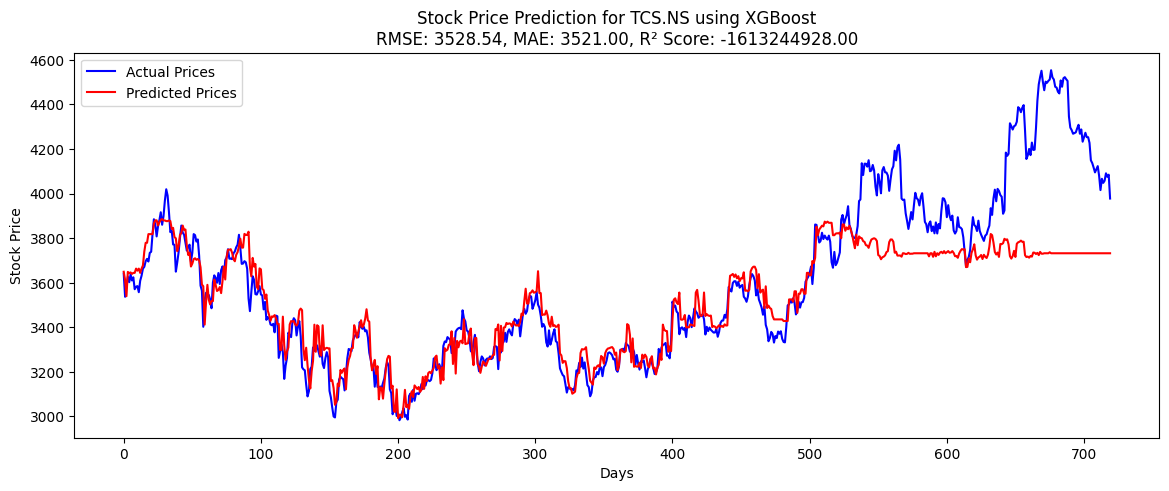

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import yfinance as yf
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

# Load historical stock data for a specific company
ticker = 'TCS.NS'  # Example: Reliance Industries Limited
data = yf.download(ticker, start='2010-01-01', end='2025-01-01')

# Preprocess the data
data = data[['Close']]
data = data.values
data = data.astype('float32')

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

# Create a dataset
def create_dataset(dataset, time_step=1):
    X, Y = [], []
    for i in range(len(dataset) - time_step):
        X.append(dataset[i:(i + time_step), 0])
        Y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(Y)

time_step = 60  # Look back 60 days
X, y = create_dataset(data_scaled, time_step)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Train XGBoost model
model_xgb = XGBRegressor(objective='reg:squarederror')
model_xgb.fit(X_train, y_train)

# Get predictions
predictions = model_xgb.predict(X_test)
predictions = scaler.inverse_transform(predictions.reshape(-1, 1))  # Inverse the scaling

# Calculate RMSE, MAE, and R²
rmse = np.sqrt(mean_squared_error(y_test, predictions))
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# Print the metrics
print(f'RMSE: {rmse:.2f}')
print(f'MAE: {mae:.2f}')
print(f'R² Score: {r2:.2f}')

# Plotting the results
plt.figure(figsize=(14, 5))
plt.plot(data[len(data) - len(predictions):], label='Actual Prices', color='blue')
plt.plot(predictions, label='Predicted Prices', color='red')
plt.title(f'Stock Price Prediction for {ticker} using XGBoost\n'
          f'RMSE: {rmse:.2f}, MAE: {mae:.2f}, R² Score: {r2:.2f}')
plt.xlabel('Days')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

[*********************100%***********************]  1 of 1 completed


Price                       Adj Close       Close        High         Low  \
Ticker                         TCS.NS      TCS.NS      TCS.NS      TCS.NS   
Date                                                                        
2010-01-04 00:00:00+00:00  285.549683  375.825012  379.450012  374.524994   
2010-01-05 00:00:00+00:00  285.625488  375.924988  379.774994  373.274994   
2010-01-06 00:00:00+00:00  279.167358  367.424988  376.100006  366.500000   
2010-01-07 00:00:00+00:00  271.398376  357.200012  369.700012  355.500000   
2010-01-08 00:00:00+00:00  265.851868  349.899994  359.250000  348.250000   

Price                            Open   Volume  
Ticker                         TCS.NS   TCS.NS  
Date                                            
2010-01-04 00:00:00+00:00  377.399994  1963682  
2010-01-05 00:00:00+00:00  377.500000  2014488  
2010-01-06 00:00:00+00:00  375.924988  3349176  
2010-01-07 00:00:00+00:00  367.750000  6474892  
2010-01-08 00:00:00+00:00  358.000000  6

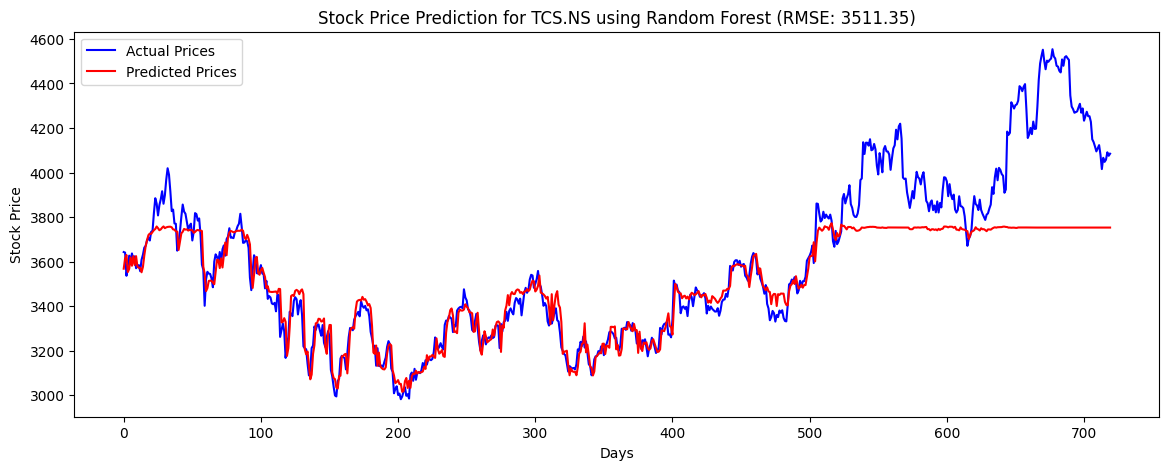

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import yfinance as yf



# Preprocess the data
ticker = 'TCS.NS'  # Example: Reliance Industries Limited
data = yf.download(ticker, start='2010-01-01', end='2024-10-31')
print(data.head())  # Print the first few rows of the data
print(data.shape)

# Preprocess the data


# Normalize the data

data = data[['Close']]
data = data.values
data = data.astype('float32')

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

# Create a dataset
X, y = create_dataset(data_scaled, time_step)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Train Random Forest model
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

# Get predictions
predictions = model_rf.predict(X_test)
predictions = scaler.inverse_transform(predictions.reshape(-1, 1))  # Inverse the scaling

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, predictions))
rmse = np.sqrt(mean_squared_error(y_test, predictions))
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# Print the metrics
print(f'RMSE: {rmse:.2f}')
print(f'MAE: {mae:.2f}')
print(f'R² Score: {r2:.2f}')

# Plotting the results
plt.figure(figsize=(14, 5))
plt.plot(data[len(data) - len(predictions):], label='Actual Prices', color='blue')
plt.plot(predictions, label='Predicted Prices', color='red')
plt.title(f'Stock Price Prediction for {ticker} using Random Forest (RMSE: {rmse:.2f})')
plt.xlabel('Days')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

[*********************100%***********************]  1 of 1 completed

Epoch 1/50



/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0141
Epoch 2/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 9.8033e-04
Epoch 3/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 7.8420e-04
Epoch 4/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 6.5802e-04
Epoch 5/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 7.3141e-04
Epoch 6/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 5.8342e-04
Epoch 7/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 6.8560e-04
Epoch 8/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 5.4375e-04
Epoch 9/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 4.9165e-04
Epoch 10/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 5.9383e-04
Epoch 11/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 5.2397e-04
Epoch 12/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 5.3286e-04
Epoch 13/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 4.6101e-04
Epoch 14/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 5.1535e-04
Epoch 15/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 

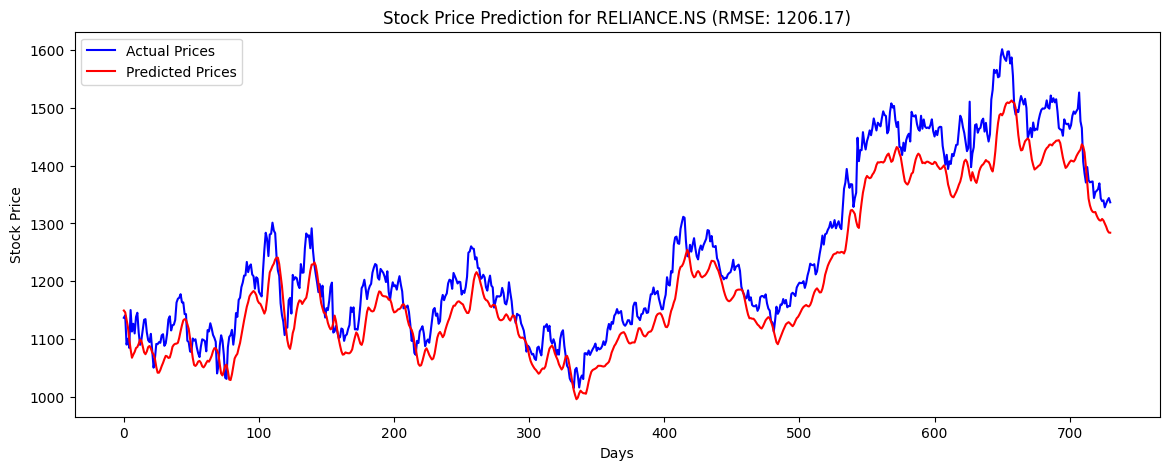

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import yfinance as yf
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

# Load historical stock data for a specific company
ticker = 'RELIANCE.NS'  # Example: Reliance Industries Limited
data = yf.download(ticker, start='2010-01-01', end='2025-01-01')

# Preprocess the data
data = data[['Close']]
data = data.values
data = data.astype('float32')

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

# Create a training dataset
train_size = int(len(data_scaled) * 0.8)
train_data = data_scaled[:train_size]

# Prepare the data for LSTM
def create_dataset(dataset, time_step=1):
    X, Y = [], []
    for i in range(len(dataset) - time_step - 1):
        X.append(dataset[i:(i + time_step), 0])
        Y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(Y)

time_step = 60  # Look back 60 days
X_train, y_train = create_dataset(train_data, time_step)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=50, batch_size=32)

# Create the test dataset
test_data = data_scaled[train_size - time_step:]
X_test, y_test = create_dataset(test_data, time_step)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Get predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)  # Inverse the scaling

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, predictions))

# Plotting the results
plt.figure(figsize=(14, 5))
plt.plot(data[len(data) - len(predictions):], label='Actual Prices', color='blue')
plt.plot(predictions, label='Predicted Prices', color='red')
plt.title(f'Stock Price Prediction for {ticker} (RMSE: {rmse:.2f})')
plt.xlabel('Days')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [ ]:
pip install prophet